In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df = pd.read_csv('climate_vs_flood.csv', header=0)
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB


In [4]:
df.isna().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

In [5]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,flood
count,5996.000000,6095.000000,6262.000000,6256.000000,3993.000000,5049.000000,6286.000000,6286.000000,6215.000000,6308.000000,6308.000000
mean,25.397598,32.577129,28.338135,76.903932,9.415502,5.008160,4.991887,193.518772,2.338214,96741.052949,0.075460
std,3.226555,5.571823,1.798969,9.719251,18.460319,2.788718,5.856961,109.211671,1.857624,5.239928,0.264153
min,2.400000,21.300000,23.700000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,0.000000
25%,24.400000,31.800000,27.700000,72.000000,0.000000,2.800000,4.000000,80.000000,1.000000,96733.000000,0.000000
50%,25.000000,32.600000,28.400000,77.000000,1.400000,5.400000,4.000000,230.000000,2.000000,96741.000000,0.000000
75%,26.000000,33.400000,29.100000,82.000000,10.500000,7.100000,5.000000,280.000000,3.000000,96745.000000,0.000000
max,246.000000,334.000000,141.600000,488.000000,277.500000,11.600000,185.000000,360.000000,82.000000,96747.000000,1.000000


In [6]:
print("Unique Value of region_name : ", df['region_name'].nunique())
print("Unique Value of station_id : ", df['station_id'].nunique())
print("Unique Value of ddd_car : ", df['ddd_car'].nunique())
print("Unique Value of station_name : ", df['station_name'].nunique())

Unique Value of region_name :  4
Unique Value of station_id :  4
Unique Value of ddd_car :  9
Unique Value of station_name :  4


In [7]:
df_ddd_car_sum = df.groupby('ddd_car', as_index=0).agg(ddd_cnt=('ddd_car', 'count'))
df_ddd_car_sum

,ddd_car,ddd_cnt
0,C,1239
1,E,626
2,N,1681
3,NE,432
4,NW,158
5,S,258
6,SE,235
7,SW,305
8,W,1273


In [8]:
df_region_sum = df.groupby(['station_id', 'region_name', 'station_name'], as_index=0).agg(station_cnt=('station_id', 'count'))
df_region_sum

,station_id,region_name,station_name,station_cnt
0,96733,Jakarta Selatan,Stasiun Klimatologi Banten,1658
1,96741,Jakarta Utara,Stasiun Meteorologi Maritim Tanjung Priok,1779
2,96745,Jakarta Pusat,Stasiun Meteorologi Kemayoran,1814
3,96747,Jakarta Timur,Halim Perdana Kusuma Jakarta,1057


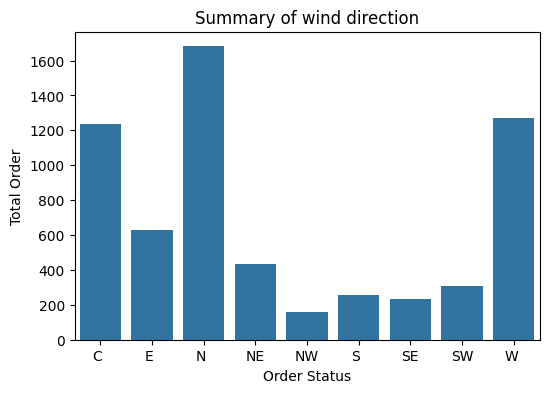

In [9]:
fig2 = plt.figure(figsize=(6,4))
sns.barplot(data=df_ddd_car_sum, x=df_ddd_car_sum['ddd_car'], y=df_ddd_car_sum['ddd_cnt'])
plt.xlabel('Order Status')
plt.ylabel('Total Order')
plt.title('Summary of wind direction')
plt.show()

In [10]:
bar = go.Bar(x=df_ddd_car_sum['ddd_car'], y=df_ddd_car_sum['ddd_cnt'])
layout = go.Layout(title='Summary of Wind Direction')
fig = go.Figure(data=[bar], layout=layout)
fig.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB


In [12]:
num_col = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
date_col = ['date']
cat_col = ['ddd_car', 'station_id', 'station_name', 'region_name']
target = ['flood']

<Axes: ylabel='ss'>

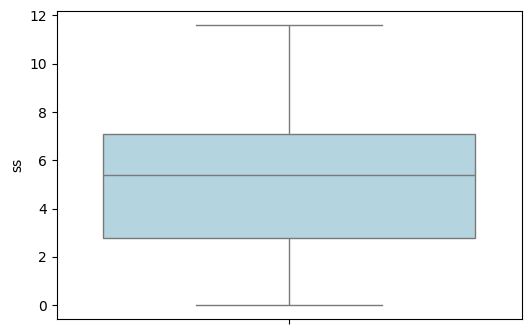

In [13]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='ss', color='#ADD8E6')

<Axes: ylabel='ddd_x'>

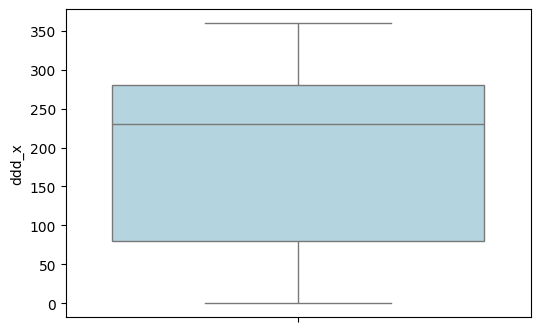

In [14]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='ddd_x', color='#ADD8E6')

<Axes: ylabel='Tx'>

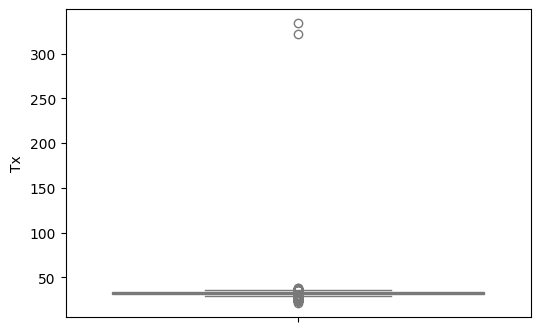

In [15]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(data=df, y='Tx', color='#ADD8E6')

<Axes: >

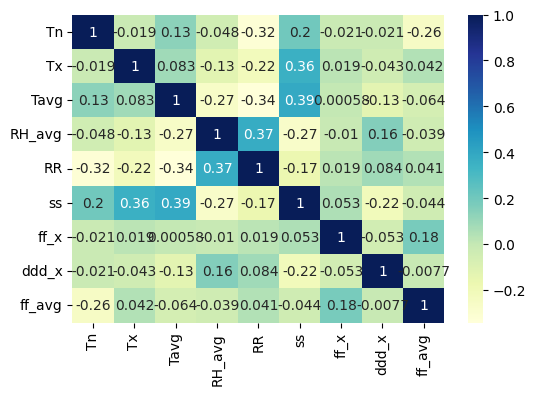

In [16]:
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df[num_col].corr(), cmap='YlGnBu', annot=True)

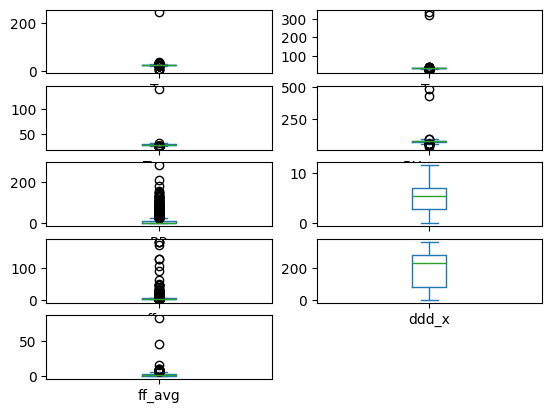

In [17]:
df[num_col].plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6308 non-null   datetime64[ns]
 1   Tn            5996 non-null   float64       
 2   Tx            6095 non-null   float64       
 3   Tavg          6262 non-null   float64       
 4   RH_avg        6256 non-null   float64       
 5   RR            3993 non-null   float64       
 6   ss            5049 non-null   float64       
 7   ff_x          6286 non-null   float64       
 8   ddd_x         6286 non-null   float64       
 9   ff_avg        6215 non-null   float64       
 10  ddd_car       6207 non-null   object        
 11  station_id    6308 non-null   int64         
 12  station_name  6308 non-null   object        
 13  region_name   6308 non-null   object        
 14  flood         6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6308 non-null   datetime64[ns]
 1   Tn            5996 non-null   float64       
 2   Tx            6095 non-null   float64       
 3   Tavg          6262 non-null   float64       
 4   RH_avg        6256 non-null   float64       
 5   RR            3993 non-null   float64       
 6   ss            5049 non-null   float64       
 7   ff_x          6286 non-null   float64       
 8   ddd_x         6286 non-null   float64       
 9   ff_avg        6215 non-null   float64       
 10  ddd_car       6207 non-null   object        
 11  station_id    6308 non-null   int64         
 12  station_name  6308 non-null   object        
 13  region_name   6308 non-null   object        
 14  flood         6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [21]:
from sklearn.impute import KNNImputer

In [22]:
imputer = KNNImputer(n_neighbors=7, weights="uniform")

In [23]:
data_imputed = imputer.fit_transform(df[num_col])

In [24]:
data_imputed

array([[ 26. ,  34.8,  28.6, ...,   5. , 280. ,   2. ],
       [ 25.6,  33.2,  27. , ...,   4. , 290. ,   2. ],
       [ 24.4,  34.9,  28.1, ...,   4. , 280. ,   2. ],
       ...,
       [ 25.2,  33.4,  28.7, ...,  14. , 120. ,   5. ],
       [ 24. ,  34.4,  30. , ...,  14. , 240. ,   5. ],
       [ 25.4,  32.8,  28.2, ...,  14. , 180. ,   5. ]])

In [25]:
df_cat = df[cat_col]

In [26]:
df_cat.isna().sum()

ddd_car         101
station_id        0
station_name      0
region_name       0
dtype: int64

In [27]:
df_cat['ddd_car'].fillna(df_cat['ddd_car'].mode()[0], inplace=True)

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_12536\546368343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df_imputed = pd.DataFrame(data_imputed, columns=num_col)

In [29]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      6308 non-null   float64
 1   Tx      6308 non-null   float64
 2   Tavg    6308 non-null   float64
 3   RH_avg  6308 non-null   float64
 4   RR      6308 non-null   float64
 5   ss      6308 non-null   float64
 6   ff_x    6308 non-null   float64
 7   ddd_x   6308 non-null   float64
 8   ff_avg  6308 non-null   float64
dtypes: float64(9)
memory usage: 443.7 KB


In [30]:
df_cat.isna().sum()

ddd_car         0
station_id      0
station_name    0
region_name     0
dtype: int64

In [31]:
df_train = pd.concat([df_imputed, df_cat], axis=1)

In [32]:
df_train.drop(columns=['station_id', 'station_name'], inplace=True)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tn           6308 non-null   float64
 1   Tx           6308 non-null   float64
 2   Tavg         6308 non-null   float64
 3   RH_avg       6308 non-null   float64
 4   RR           6308 non-null   float64
 5   ss           6308 non-null   float64
 6   ff_x         6308 non-null   float64
 7   ddd_x        6308 non-null   float64
 8   ff_avg       6308 non-null   float64
 9   ddd_car      6308 non-null   object 
 10  region_name  6308 non-null   object 
dtypes: float64(9), object(2)
memory usage: 542.2+ KB


In [34]:
df_train_dummied = pd.get_dummies(df_train, columns=['ddd_car', 'region_name'], drop_first=True)

In [35]:
rf = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_train_dummied, df[target], test_size=0.25, random_state=42)

In [37]:
m1 = rf.fit(X_train, y_train)

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [38]:
m1_predict = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(y_test, m1_predict)

In [41]:
print(accuracy)

0.9188332276474318


In [42]:
# Masukkan input dalam bentuk array 2 dimensi dengan reshape
input_data = np.array([26, 32, 30, 80, 120, 2, 10, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]).reshape(1, -1)

# Lakukan prediksi menggunakan model random forest
m1_predict2 = rf.predict(input_data)

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [43]:
# Print hasil prediksi
print(m1_predict2)

[1]


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tn           6308 non-null   float64
 1   Tx           6308 non-null   float64
 2   Tavg         6308 non-null   float64
 3   RH_avg       6308 non-null   float64
 4   RR           6308 non-null   float64
 5   ss           6308 non-null   float64
 6   ff_x         6308 non-null   float64
 7   ddd_x        6308 non-null   float64
 8   ff_avg       6308 non-null   float64
 9   ddd_car      6308 non-null   object 
 10  region_name  6308 non-null   object 
dtypes: float64(9), object(2)
memory usage: 542.2+ KB


In [51]:
df_train

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,region_name
0,26.0,34.8,28.6,81.0,9.114286,5.800000,5.0,280.0,2.0,S,Jakarta Selatan
1,25.6,33.2,27.0,88.0,1.600000,8.700000,4.0,290.0,2.0,W,Jakarta Selatan
2,24.4,34.9,28.1,80.0,33.800000,5.400000,4.0,280.0,2.0,SW,Jakarta Selatan
3,24.8,33.6,29.2,81.0,17.742857,6.600000,3.0,200.0,1.0,S,Jakarta Selatan
4,25.8,33.6,26.7,91.0,11.457143,3.200000,3.0,180.0,1.0,S,Jakarta Selatan
...,...,...,...,...,...,...,...,...,...,...,...
6303,23.8,32.0,28.0,70.0,15.571429,6.285714,12.0,180.0,5.0,W,Jakarta Timur
6304,24.0,33.4,28.5,69.0,2.085714,4.914286,14.0,250.0,3.0,SE,Jakarta Timur
6305,25.2,33.4,28.7,70.0,5.300000,6.942857,14.0,120.0,5.0,SW,Jakarta Timur
6306,24.0,34.4,30.0,64.0,6.242857,5.742857,14.0,240.0,5.0,W,Jakarta Timur


In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [55]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [6.66814496e+00 8.84639673e+00 1.48711299e+01 2.42044616e+02
 1.12521328e+04 3.64333223e+01 2.65805602e-01 2.11898754e+02
 1.41914560e+00 6.80532224e+00 1.43724379e+01 5.96385016e-01
 2.60754456e+00 9.21282468e+00 3.09497495e-01 1.13964091e+01
 8.73209159e+00 4.17905432e+01 5.32351776e+01 7.87779053e+00]
Feature list: Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg',
       'ddd_car_E ', 'ddd_car_N ', 'ddd_car_NE', 'ddd_car_NW', 'ddd_car_S ',
       'ddd_car_SE', 'ddd_car_SW', 'ddd_car_W ', 'region_name_Jakarta Selatan',
       'region_name_Jakarta Timur', 'region_name_Jakarta Utara'],
      dtype='object')


In [60]:
from sklearn.metrics import f1_score,confusion_matrix

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy is:  0.9067850348763475


<Axes: >

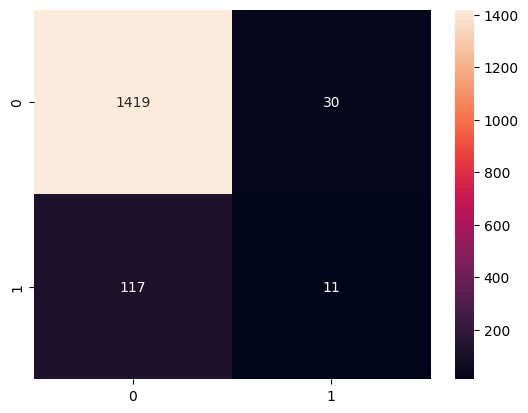

In [62]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
clf_rf_2 = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [75]:
X_train_2

array([[7.40000000e+01, 4.87142857e+00, 6.00000000e+01, 1.00000000e+00,
        0.00000000e+00],
       [7.10000000e+01, 1.42857143e-02, 7.00000000e+01, 1.00000000e+00,
        0.00000000e+00],
       [9.80000000e+01, 4.40000000e+00, 3.00000000e+02, 0.00000000e+00,
        1.00000000e+00],
       ...,
       [8.80000000e+01, 3.48000000e+01, 3.20000000e+02, 0.00000000e+00,
        0.00000000e+00],
       [7.40000000e+01, 2.88571429e+00, 4.00000000e+01, 0.00000000e+00,
        1.00000000e+00],
       [7.00000000e+01, 1.07142857e+00, 8.00000000e+01, 1.00000000e+00,
        0.00000000e+00]])

In [63]:
from sklearn.feature_selection import RFE
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please

In [72]:
import pandas as pd

# Dapatkan indeks fitur-fitur yang dipilih
selected_feature_indices = rfe.support_

# Dapatkan nama kolom-kolom yang sesuai dengan fitur-fitur yang dipilih
selected_feature_names = X_train.columns[selected_feature_indices]

# Buat DataFrame baru dengan fitur-fitur yang dipilih
X_train_selected_df = pd.DataFrame(data=X_train, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(data=X_test, columns=selected_feature_names)

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy is:  0.9124920735573875


<Axes: >

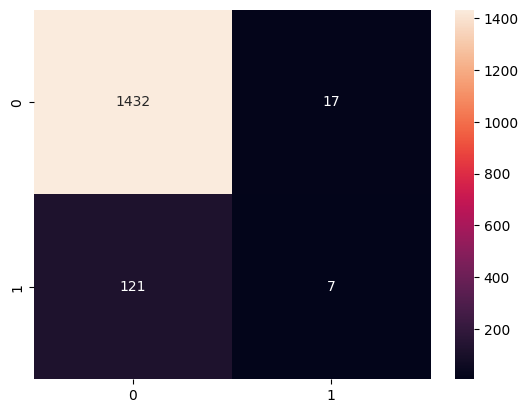

In [73]:
clf_rf_2 = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)      
clr_rf_2 = clf_rf_2.fit(X_train_selected_df,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_selected_df))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_selected_df))
sns.heatmap(cm_2,annot=True,fmt="d")

In [76]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\fayme amelia celesta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please

Optimal number of features : 11
Best features : Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg',
       'ddd_car_W ', 'region_name_Jakarta Selatan'],
      dtype='object')


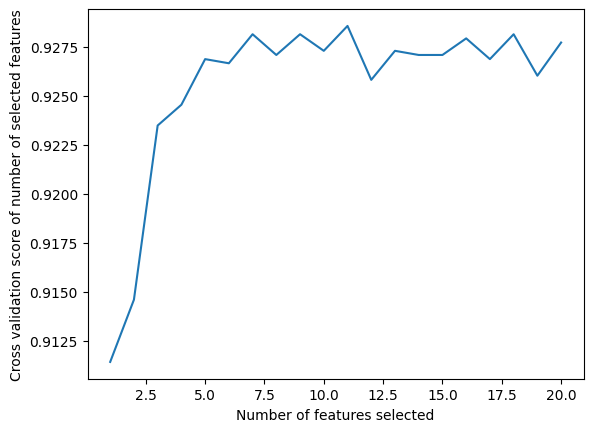

In [78]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()